In [1]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
d100 = pd.read_csv('d100.csv') # читаю данные, полученные парсером от 20 компаний за 100 дней

In [4]:
df = pd.DataFrame(columns=[f'day{i + 1}' for i in range(31)]) # создаю датасет для обучения - 30 дней потом будут "X", а 31 - "y"

In [5]:
for i in d100: # заполняю датасет
  for j in range(d100.shape[0] - 30):
    df.loc[df.shape[0]] = list(d100[i][j:j + 31]) 

In [6]:
X = df.drop(columns=['day31']) # 30 дней будут "X", а 31 надо предсказать
y = df['day31']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # Создаю обучающие и валидационные выборки

In [ ]:
# перебор моделей

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
a_lr = model.predict(X_test)

from sklearn.tree import DecisionTreeRegressor

# Создадим модель дерева решений
model = DecisionTreeRegressor()

# обучение модели
model.fit(X_train, y_train)

# предсказание ответов для тестовой выборки
a_dt = model.predict(X_test)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=300, random_state=0)

# обучение модели
model.fit(X_train, y_train)

# предсказание ответов для тестовой выборки
a_rf = model.predict(X_test)

from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, y_train)
a_knn = model.predict(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=300, random_state=0)
model.fit(X_train, y_train)
a_gb = model.predict(X_test)

from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)
a_hgb = model.predict(X_test)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators=300, random_state=0)
model.fit(X_train, y_train)
a_et = model.predict(X_test)

In [ ]:
from sklearn.linear_model import PassiveAggressiveRegressor

model = PassiveAggressiveRegressor(random_state=0)
model.fit(X_train, y_train)
a_pa = model.predict(X_test)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(n_estimators=300, random_state=0)
model.fit(X_train, y_train)
a_ada = model.predict(X_test)

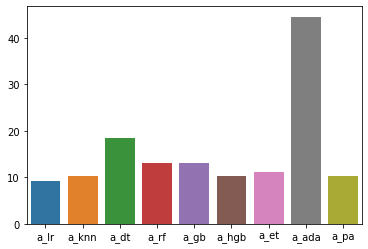

In [ ]:
# сравнимаю точность моделей по двум ошибкам - mean_squared_error и max_error

from sklearn.metrics import mean_squared_error as accuracy


sns.barplot(
    x=['a_lr', 'a_knn', 'a_dt', 'a_rf', 'a_gb', 'a_hgb', 'a_et', 'a_ada', 'a_pa'],
    y=[accuracy(a_lr, y_test), accuracy(a_knn, y_test), accuracy(a_dt, y_test), accuracy(a_rf, y_test), accuracy(a_gb, y_test), accuracy(a_hgb, y_test), accuracy(a_et, y_test), accuracy(a_ada, y_test), accuracy(a_pa, y_test)]
    );

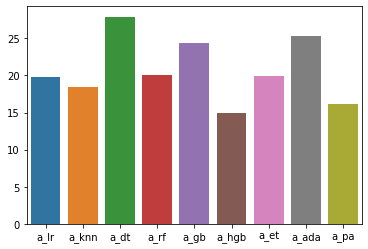

In [ ]:
from sklearn.metrics import max_error as accuracy


sns.barplot(
    x=['a_lr', 'a_knn', 'a_dt', 'a_rf', 'a_gb', 'a_hgb', 'a_et', 'a_ada', 'a_pa'],
    y=[accuracy(a_lr, y_test), accuracy(a_knn, y_test), accuracy(a_dt, y_test), accuracy(a_rf, y_test), accuracy(a_gb, y_test), accuracy(a_hgb, y_test), accuracy(a_et, y_test), accuracy(a_ada, y_test), accuracy(a_pa, y_test)]
    );

In [ ]:
accu = {
    'a_lr': accuracy(a_lr, y_test),
    'a_knn': accuracy(a_knn, y_test),
    'a_dt': accuracy(a_dt, y_test),
    'a_rf': accuracy(a_rf, y_test),
    'a_gb': accuracy(a_gb, y_test),
    'a_hgb': accuracy(a_hgb, y_test),
    'a_et': accuracy(a_et, y_test),
    'a_ada': accuracy(a_ada, y_test),
    'a_pa': accuracy(a_pa, y_test)
}
print(accu)
print(min(accu.values())) # минимальная ошибка

{'a_lr': 19.79797640809475, 'a_knn': 18.387500000000045, 'a_dt': 27.900000000000034, 'a_rf': 20.12093333333263, 'a_gb': 24.35954564212642, 'a_hgb': 15.004169638593334, 'a_et': 19.925299999999652, 'a_ada': 25.36766666666665, 'a_pa': 16.138867549642526}
15.004169638593334


In [8]:
def predict(name, k, model): # предсказание акции name моделью model на k дней
  col = list(d100[name])[:30]
  ans = col[:]
  for i in range(k):
    q = model.predict([col])[0];
    col.append(q)
    ans.append(q)
    col.pop(0)
  return ans

In [9]:
from sklearn.linear_model import LinearRegression # 3 лучших модели

lr = LinearRegression()
lr.fit(X, y)

from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor()
hgb.fit(X, y)

from sklearn.linear_model import PassiveAggressiveRegressor

pa = PassiveAggressiveRegressor(random_state=0)
pa.fit(X, y)

PassiveAggressiveRegressor(random_state=0)

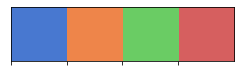

In [10]:
sns.palplot(sns.color_palette('muted', n_colors=4)) # палитра для понимания какая где модель

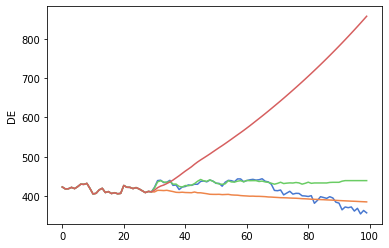

In [15]:
name = 'DE' # название акции
c = sns.color_palette('muted', n_colors=4)
# строю графики
x = [i for i in range(100)]
sns.lineplot(x=x, y=d100[name], color=c[0]);
sns.lineplot(x=x, y=predict(name, 70, lr), color=c[1]);
sns.lineplot(x=x, y=predict(name, 70, hgb), color=c[2]);
sns.lineplot(x=x, y=predict(name, 70, pa), color=c[3]);

In [19]:
import pickle # сохраняем модель для web приложения


with open('model.pkl', 'wb') as file:
  pickle.dump(hgb, file)

In [ ]:
with open('model.pkl', 'rb') as file:
  model = pickle.load(file)